# Capstone Project: UK Immigration/Asylum Analysis (2001-2023)

## Book 4: Advanced Modelling

Author: Patrick Smith

Date: 09/04/2024

Contact: patrick.b.smith@gmail.com

## Description of Variables 

| Column                         | Descriptor                                                                 | Datatype |
|--------------------------------|----------------------------------------------------------------------------|----------|
| Year                           | The period in which the event occurred.                                    | int32    |
| Quarter                        | Quarter of the year (Q1=1, Q2=2, Q3=3, Q4=4).                              | object   |
| Nationality                    | Nationality of the individual.                                             | object   |
| Age                            | Age of the individual at the time of the event.                             | object   |
| Sex                            | Gender of the individual (male, female, other/unknown).                     | int32    |
| Return destination group       | Grouped destination country for return (Home country, EU, Other country).   | object   |
| Return destination             | Specific destination country for return.                                    | object   |
| Applicant type                 | Type of applicant (main applicant, dependant).                             | object   |
| Case outcome                   | Outcome of the case (granted, refused, withdrawn, resettlement).             | object   |
| Decisions                      | Number of decisions made.                                                   | float64  |
| Occupation                     | Occupation of the individual.                                              | object   |
| Industry                       | Industry sector for which the application to work was made.                 | object   |
| Occ. major group               | Major group classification of the occupation.                              | object   |
| Occ. sub-major group           | Sub-major group classification of the occupation.                          | object   |
| Occ. minor group               | Minor group classification of the occupation.                              | object   |
| Occ. unit group                | Unit group classification of the occupation.                               | object   |
| Sex_Male                       | Dummy variable for male (1 if male, 0 otherwise).                          | object   |
| Sex_Female                     | Dummy variable for female (1 if female, 0 otherwise).                      | object   |
| Sex_Other                      | Dummy variable for other or NA (1 if other/unknown, 0 otherwise).          | object   |
| General Region                 | Consolidated Region                                                        | object   |

## Table of Contents - Book 3

[Preprocessing: Case Outcome](#Case_Outcome) 

[Preprocessing: Visa Outcome](#Visa_Outcomes) 

[Preprocessing: Age](#Age) 

[Baseline Modelling](#B_Model)


## Data Loading

<div id='Load'></div>

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
#see max columns
pd.options.display.max_columns = None

In [3]:
file_path = r'C:\Users\patri\Downloads\df_model.csv'

df_model = pd.read_csv(file_path, low_memory=False)

## Next Objective

1) Pre-Processing
2) Focus on dependent variable, case outcome
3) Further improve data quality by imputation
4) Begin baseline modelling
5) Split the data into train and test sets
6) Try several different simplier models to get started
7) Plots and univariate and bivariate distribution
8) Initial insights and conclusions to shareholders

In [ ]:
#Decision trees - finding question points towards impurities
#metrics eval - check agianst other models
#random forest after decision trees - ensamble learning


In [4]:
df_model.head()

,Year,Quarter,Nationality,Region,Age,Sex,Case outcome,Decisions,Occupation,Industry,General_Region
0,2001,1,Afghanistan,Asia Central,Unknown,3,Asylum Case,2652.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia
1,2001,1,Afghanistan,Asia Central,Unknown,3,Asylum Case,809.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia
2,2001,1,Afghanistan,Asia Central,Unknown,3,Asylum Case,15.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia
3,2001,1,Afghanistan,Asia Central,Unknown,3,Asylum Case,88.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia
4,2001,1,Afghanistan,Asia Central,Unknown,3,Asylum Case,609.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia


In [5]:
df_model.duplicated().sum()

0

In [6]:
df_model = df_model.drop_duplicates()

print(f"We have {df_model.shape[0]} rows and {df_model.shape[1]} columns with string, floats and integers in our clean data.")

We have 916384 rows and 11 columns with string, floats and integers in our clean data.


In [7]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916384 entries, 0 to 916383
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            916384 non-null  int64  
 1   Quarter         916384 non-null  int64  
 2   Nationality     916384 non-null  object 
 3   Region          916384 non-null  object 
 4   Age             916384 non-null  object 
 5   Sex             916384 non-null  int64  
 6   Case outcome    916384 non-null  object 
 7   Decisions       916384 non-null  float64
 8   Occupation      916384 non-null  object 
 9   Industry        916384 non-null  object 
 10  General_Region  916384 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 76.9+ MB


Making a df without nationality and occupation in case we need to. Unnecesary clutter. 

In [ ]:
df_model.to_csv('C:/Users/patri/Downloads/df_model.csv', index=False)

In [8]:
df_reduced = df_model.drop(['Nationality', 'Occupation', 'Industry', 'Region'], axis=1)

In [9]:
df_reduced.duplicated().sum()

655555

In [10]:
df_reduced = df_reduced.drop_duplicates()

print(f"We have {df_reduced.shape[0]} rows and {df_reduced.shape[1]} columns with string, floats and integers in our clean data for our df_reduced.")

We have 260829 rows and 7 columns with string, floats and integers in our clean data for our df_reduced.


In [11]:
df_reduced_nat = df_model.drop(['Occupation', 'Industry', 'General_Region', 'Region'], axis=1)

In [12]:
df_reduced_nat = df_reduced_nat.drop_duplicates()

print(f"We have {df_reduced_nat.shape[0]} rows and {df_reduced_nat.shape[1]} columns with string, floats and integers in our clean data for our df_reduced.")

We have 746307 rows and 7 columns with string, floats and integers in our clean data for our df_reduced.


In [13]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260829 entries, 0 to 916378
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            260829 non-null  int64  
 1   Quarter         260829 non-null  int64  
 2   Age             260829 non-null  object 
 3   Sex             260829 non-null  int64  
 4   Case outcome    260829 non-null  object 
 5   Decisions       260829 non-null  float64
 6   General_Region  260829 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 15.9+ MB


In [14]:
df_reduced_nat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 746307 entries, 0 to 916383
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Year          746307 non-null  int64  
 1   Quarter       746307 non-null  int64  
 2   Nationality   746307 non-null  object 
 3   Age           746307 non-null  object 
 4   Sex           746307 non-null  int64  
 5   Case outcome  746307 non-null  object 
 6   Decisions     746307 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 45.6+ MB


df_reduced is 38% of df_model. good to know for encoding purposes

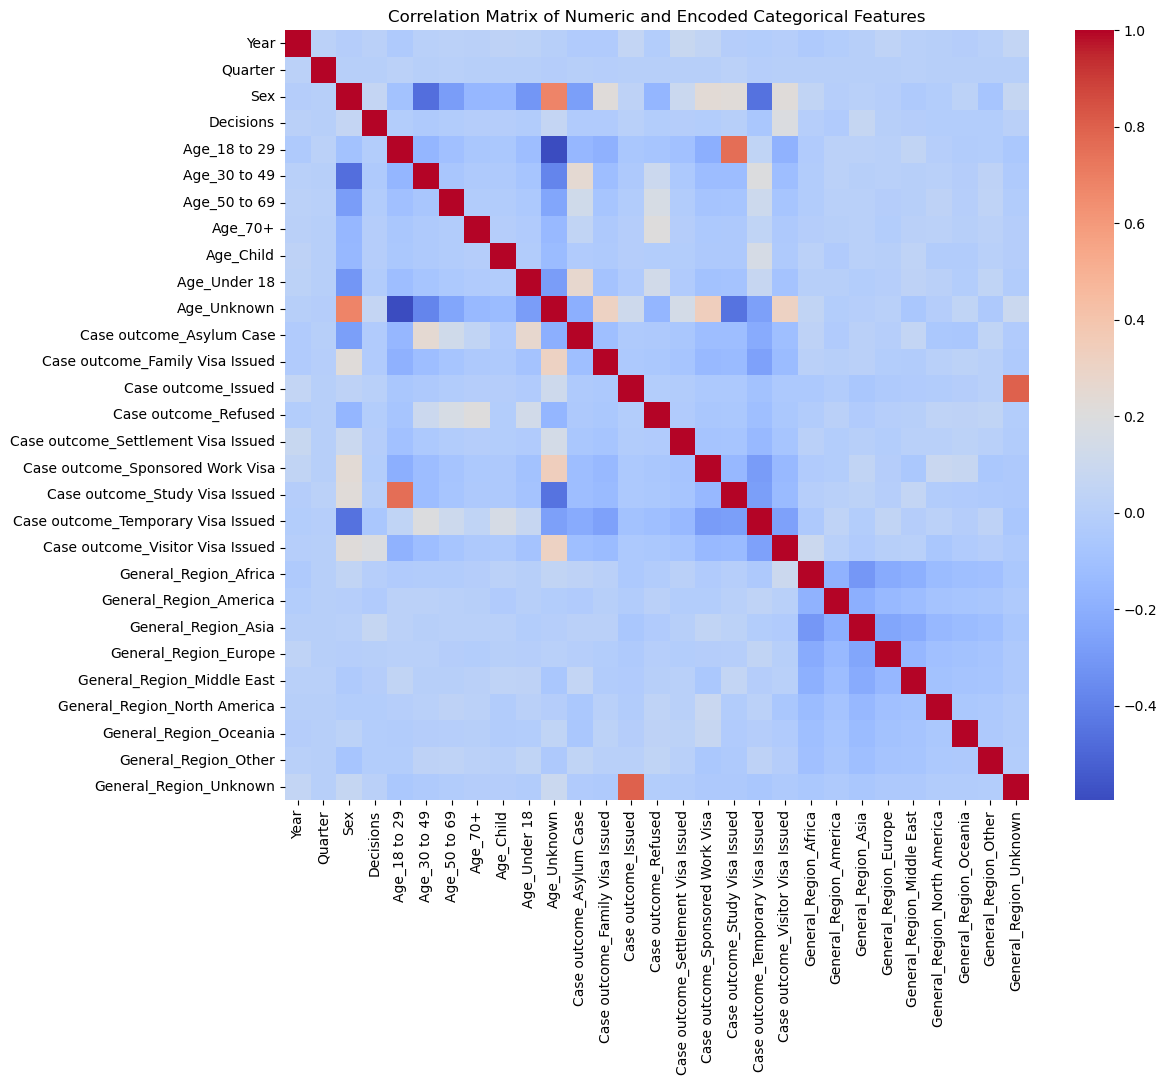

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Automatically detect and one-hot encode all categorical (object-type) columns
categorical_cols = df_reduced.select_dtypes(include=['object']).columns
df_reduced = pd.get_dummies(df_reduced, columns=categorical_cols)

# Numeric columns, allowing for correlation calculation
corr_matrix = df_reduced.corr()

plt.figure(figsize=(12, 10))  # Adjust the size as needed
sns.heatmap(corr_matrix, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numeric and Encoded Categorical Features')
plt.show()


Let's also make a numeric_df to extract all the integers and floats

This is because many other rows are categorical and objects

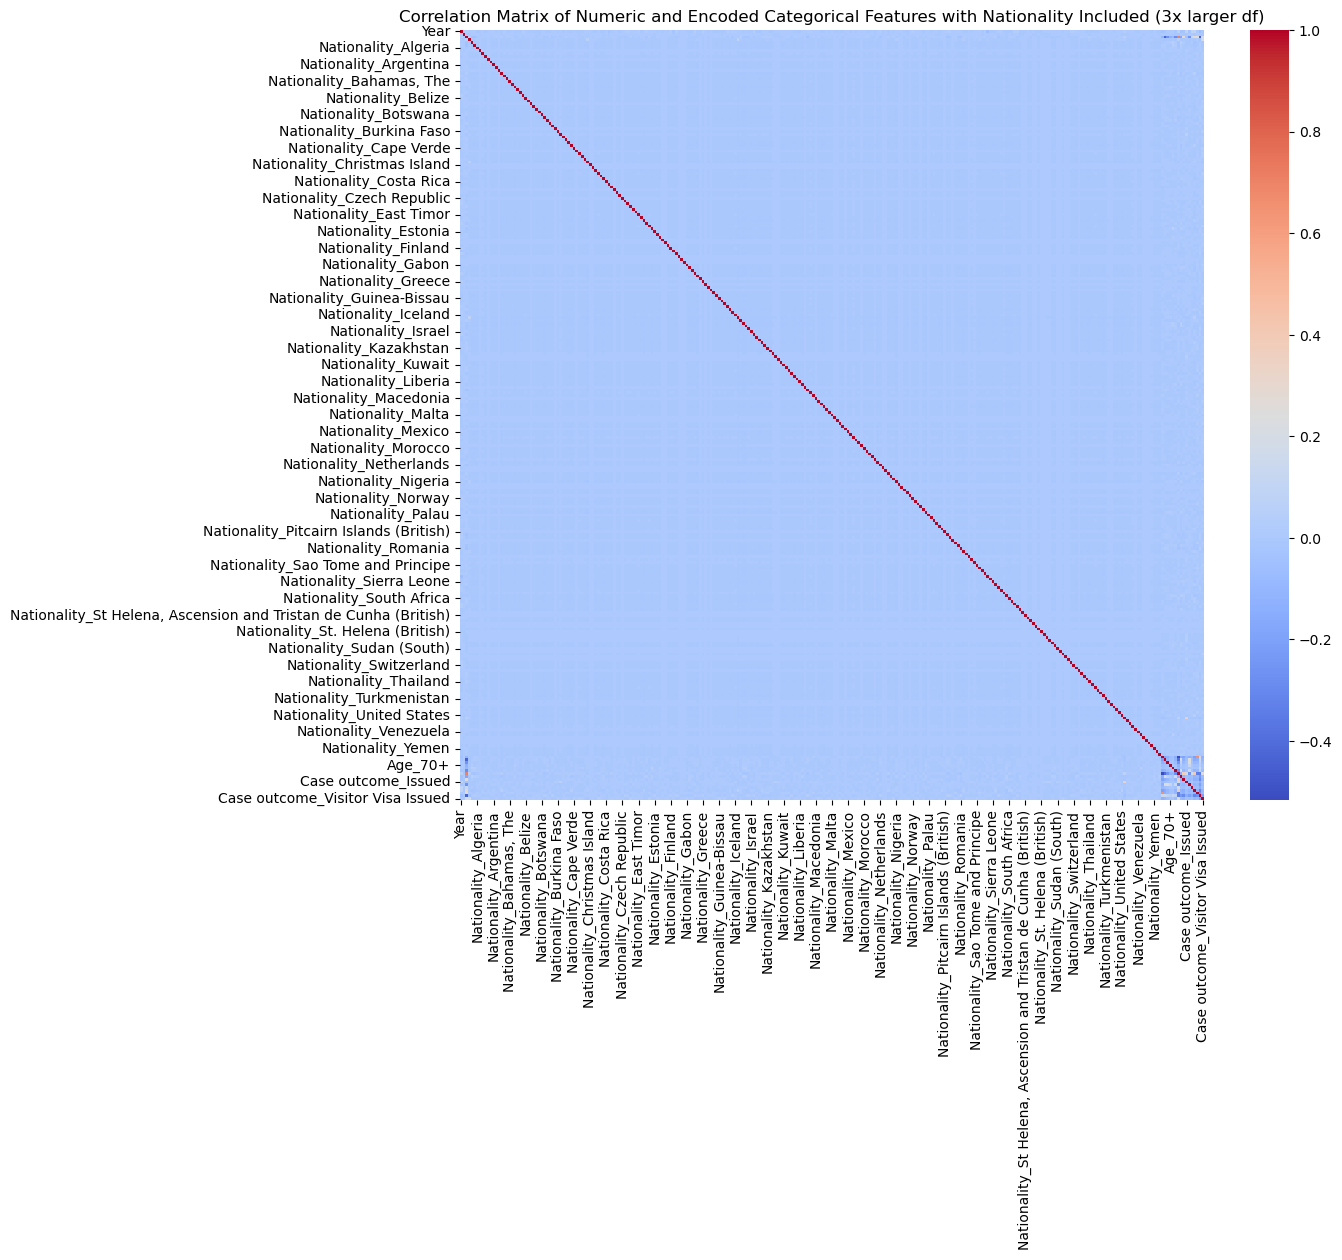

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Automatically detect and one-hot encode all categorical (object-type) columns
categorical_cols = df_reduced_nat.select_dtypes(include=['object']).columns
df_reduced_nat = pd.get_dummies(df_reduced_nat, columns=categorical_cols)

# Numeric columns, allowing for correlation calculation
corr_matrix2 = df_reduced_nat.corr()

plt.figure(figsize=(12, 10))  # Adjust the size as needed
sns.heatmap(corr_matrix2, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numeric and Encoded Categorical Features with Nationality Included (3x larger df)')
plt.show()


In [17]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260829 entries, 0 to 916378
Data columns (total 29 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Year                                 260829 non-null  int64  
 1   Quarter                              260829 non-null  int64  
 2   Sex                                  260829 non-null  int64  
 3   Decisions                            260829 non-null  float64
 4   Age_18 to 29                         260829 non-null  bool   
 5   Age_30 to 49                         260829 non-null  bool   
 6   Age_50 to 69                         260829 non-null  bool   
 7   Age_70+                              260829 non-null  bool   
 8   Age_Child                            260829 non-null  bool   
 9   Age_Under 18                         260829 non-null  bool   
 10  Age_Unknown                          260829 non-null  bool   
 11  Case outcome_Asylu

In [20]:
df_reduced_nat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 746307 entries, 0 to 916383
Columns: 277 entries, Year to Case outcome_Visitor Visa Issued
dtypes: bool(273), float64(1), int64(3)
memory usage: 222.8 MB


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Features: Drop all 'Case outcome_' columns to avoid data leakage, along with any other necessary adjustments
X = df_reduced.drop(columns=[col for col in df_reduced if col.startswith('Case outcome_')])
y = df_reduced['Case outcome_Refused']

# Followed by train_test_split, model fitting, and evaluation as previously shown

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs')
model.fit(X_train, y_train)

# Predicting the target variable for the testing set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9751562320285243

Classification Report:
               precision    recall  f1-score   support

       False       0.98      1.00      0.99     50971
        True       0.00      0.00      0.00      1195

    accuracy                           0.98     52166
   macro avg       0.49      0.50      0.49     52166
weighted avg       0.95      0.98      0.96     52166



In [ ]:
df_encoded_nat.info()

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define target variable explicitly before feature matrix to avoid it being dropped
y = df_reduced_nat['Case outcome_Refused'].copy()

# Drop 'Case outcome_' related columns to avoid data leakage
X = df_reduced_nat.drop(columns=[col for col in df_reduced_nat if col.startswith('Case outcome_')])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs')
model.fit(X_train, y_train)

# Predicting the target variable for the testing set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9375929573501628

Classification Report:
               precision    recall  f1-score   support

       False       0.94      1.00      0.97    139974
        True       0.00      0.00      0.00      9288

    accuracy                           0.94    149262
   macro avg       0.47      0.50      0.48    149262
weighted avg       0.88      0.94      0.91    149262



In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Features: Drop all 'Case outcome_' columns to avoid data leakage, along with any other necessary adjustments
X = df_reduced.drop(columns=[col for col in df_reduced if col.startswith('Case outcome_')])

# Assuming 'Case outcome_Refused' is correctly set as y before splitting
# Ensure this line is correctly placed before defining X and y:
y = df_reduced['Case outcome_Study Visa Issued']

# Followed by train_test_split, model fitting, and evaluation as previously shown

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs')
model.fit(X_train, y_train)

# Predicting the target variable for the testing set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9972779204846068

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     45572
        True       0.98      1.00      0.99      6594

    accuracy                           1.00     52166
   macro avg       0.99      1.00      0.99     52166
weighted avg       1.00      1.00      1.00     52166



In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define target variable explicitly before feature matrix to avoid it being dropped
y = df_reduced_nat['Case outcome_Study Visa Issued'].copy()

# Drop 'Case outcome_' related columns to avoid data leakage
X = df_reduced_nat.drop(columns=[col for col in df_reduced_nat if col.startswith('Case outcome_')])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs')
model.fit(X_train, y_train)

# Predicting the target variable for the testing set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.997795822111455

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    134167
        True       0.98      1.00      0.99     15095

    accuracy                           1.00    149262
   macro avg       0.99      1.00      0.99    149262
weighted avg       1.00      1.00      1.00    149262



In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create a binary target variable: 1 for 'Refused' or 'Study Visa Issued', 0 otherwise
df_reduced_nat['Target'] = (df_reduced_nat['Case outcome_Refused'] | df_reduced_nat['Case outcome_Study Visa Issued']).astype(int) | df_reduced_nat['Case outcome_Asylum Case'])
# Target variable
y = df_reduced_nat['Target'].copy()

# Drop 'Case outcome_' related columns, other than Refused & Study Visa, including the new 'Target' column 
X = df_reduced_nat.drop(columns=[col for col in df_reduced_nat if col.startswith('Case outcome_')] + ['Target'])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training
model = LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs')
model.fit(X_train, y_train)

# Predicting the target variable for the testing set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.932708927925393

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96    124879
           1       0.90      0.66      0.76     24383

    accuracy                           0.93    149262
   macro avg       0.92      0.82      0.86    149262
weighted avg       0.93      0.93      0.93    149262



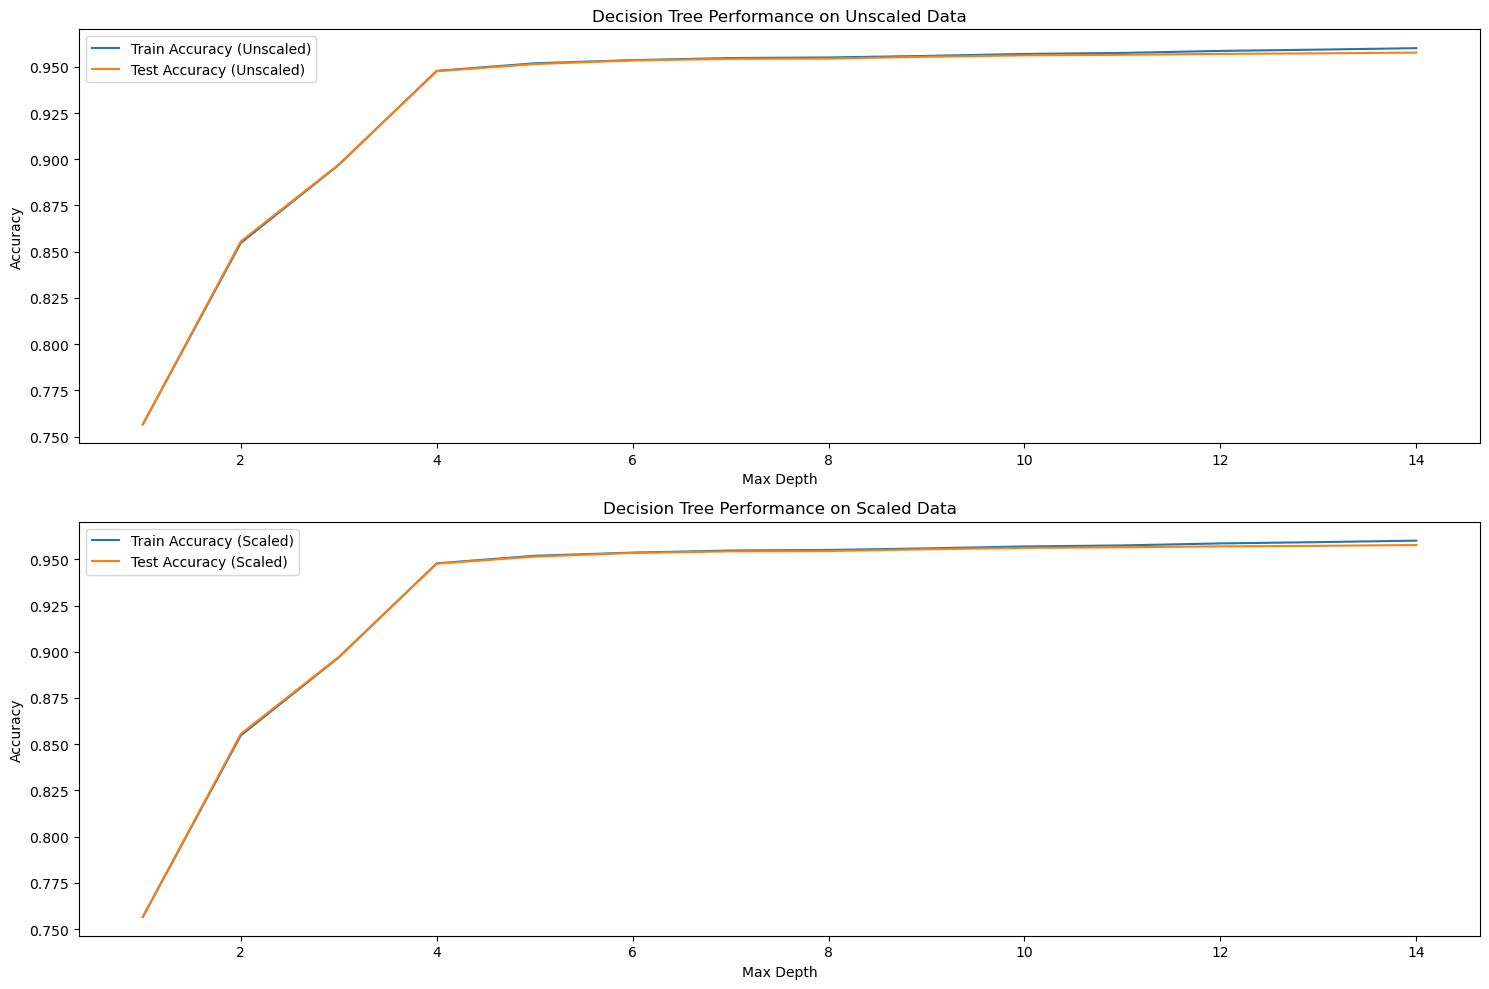

              precision    recall  f1-score   support

           0       0.94      0.99      0.97    112937
           1       0.98      0.82      0.89     36325

    accuracy                           0.95    149262
   macro avg       0.96      0.91      0.93    149262
weighted avg       0.95      0.95      0.95    149262



In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df_reduced_nat is loaded with your data

# Step 1: Create the binary target variable
# Combine 'Refused', 'Study Visa Issued', or 'Asylum Case' into a single binary target variable
df_reduced_nat['Target'] = ((df_reduced_nat['Case outcome_Refused'] | 
                             df_reduced_nat['Case outcome_Study Visa Issued']) | 
                             df_reduced_nat['Case outcome_Asylum Case']).astype(int)

# Step 2: Define features, excluding 'Age_Unknown' and any 'Case outcome_' related columns, and prepare X and y
features = [col for col in df_reduced_nat.columns if col not in ['Age_Unknown', 'Target'] and not col.startswith('Case outcome_')]
X = df_reduced_nat[features]
y = df_reduced_nat['Target']

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Scale the data for comparison (not required for Decision Trees but shown here for educational purposes)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize lists to store accuracies
train_accs, test_accs = [], []
train_accs_s, test_accs_s = [], []

depth_values = range(1, 15)

# Step 4: Train and evaluate Decision Tree model on unscaled data
for d in depth_values:
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt.fit(X_train, y_train)
    train_accs.append(dt.score(X_train, y_train))
    test_accs.append(dt.score(X_test, y_test))

# Step 5: Train and evaluate the model on scaled data (for educational purposes)
for d in depth_values:
    dt_scaled = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt_scaled.fit(X_train_scaled, y_train)
    train_accs_s.append(dt_scaled.score(X_train_scaled, y_train))
    test_accs_s.append(dt_scaled.score(X_test_scaled, y_test))

# Plotting the performance
plt.figure(figsize=(15, 10))

# Unscaled Data Plot
plt.subplot(211)
plt.plot(depth_values, train_accs, label='Train Accuracy (Unscaled)')
plt.plot(depth_values, test_accs, label='Test Accuracy (Unscaled)')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance on Unscaled Data')

# Scaled Data Plot
plt.subplot(212)
plt.plot(depth_values, train_accs_s, label='Train Accuracy (Scaled)')
plt.plot(depth_values, test_accs_s, label='Test Accuracy (Scaled)')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance on Scaled Data')

plt.tight_layout()
plt.show()

# Optional: Print classification report for chosen depth
chosen_depth = 5  # Example, adjust based on observation
dt_optimal = DecisionTreeClassifier(max_depth=chosen_depth, random_state=42)
dt_optimal.fit(X_train, y_train)
y_pred = dt_optimal.predict(X_test)
print(classification_report(y_test, y_pred))


Now we're focused on Advanced modelling

We will:

1) Prepare the data
2) Spilt the data to training and testing sets
3) Initialize the model 
4) Fit the model
5) Evaluate

In [29]:
df_reduced_nat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260829 entries, 0 to 916378
Data columns (total 29 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Year                                 260829 non-null  int64  
 1   Quarter                              260829 non-null  int64  
 2   Sex                                  260829 non-null  int64  
 3   Decisions                            260829 non-null  float64
 4   Age_18 to 29                         260829 non-null  bool   
 5   Age_30 to 49                         260829 non-null  bool   
 6   Age_50 to 69                         260829 non-null  bool   
 7   Age_70+                              260829 non-null  bool   
 8   Age_Child                            260829 non-null  bool   
 9   Age_Under 18                         260829 non-null  bool   
 10  Age_Unknown                          260829 non-null  bool   
 11  Case outcome_Asylu

In [ ]:
#Decision trees - finding question points towards impurities
#metrics eval - check agianst other models
#random forest after decision trees - ensamble learning


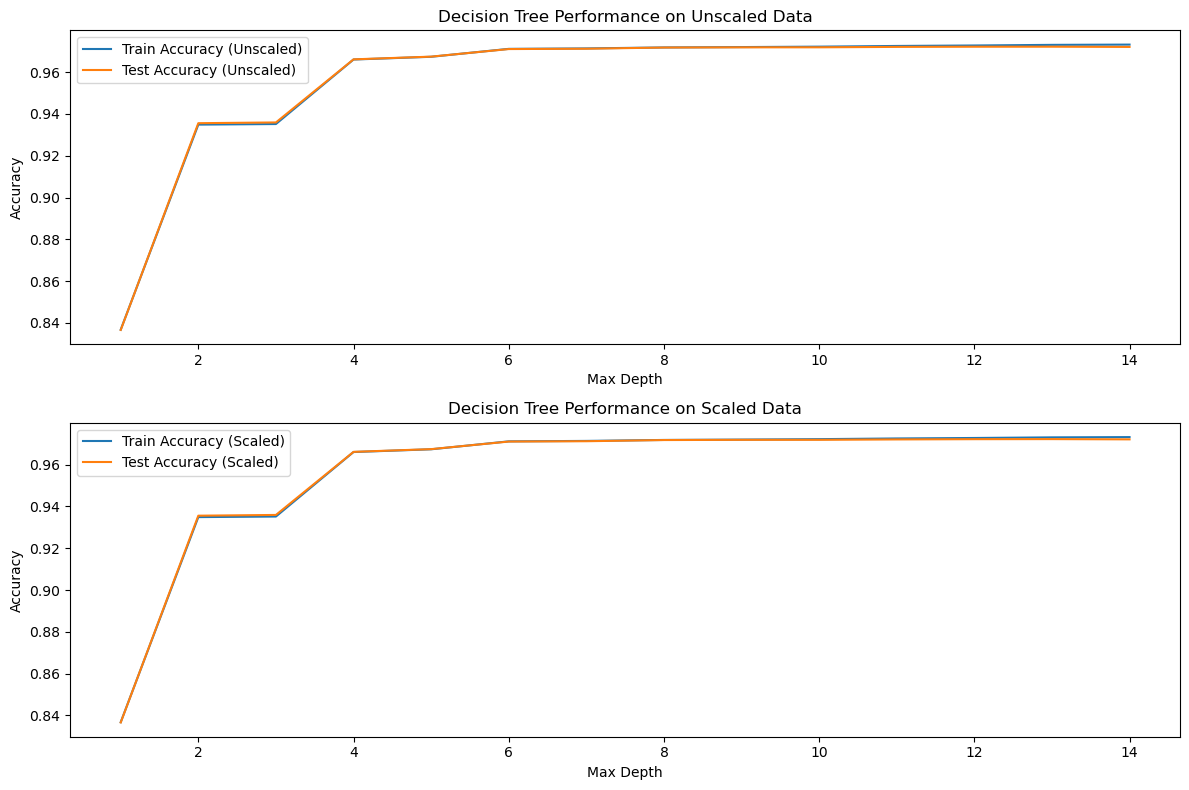

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df_reduced is correctly prepared with the 'Target' column

# Split the features and the target
features = [col for col in df_reduced_nat.columns if col not in ['Age_Unknown', 'Target'] and not col.startswith('Case outcome_')]
X = df_reduced_nat[features]
y = df_reduced_nat['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the training and testing feature sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Correctly initialize lists for storing accuracies
train_accs, test_accs = [], []
train_accs_s, test_accs_s = [], []  # Correct initialization

depth_values = list(range(1, 15))

# Evaluate Decision Tree performance on unscaled data across different tree depths
for d in depth_values:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    train_accs.append(dt.score(X_train, y_train))
    test_accs.append(dt.score(X_test, y_test))

# Evaluate Decision Tree performance on scaled data across different tree depths
for d in depth_values:
    dt_scaled = DecisionTreeClassifier(max_depth=d)
    dt_scaled.fit(X_train_scaled, y_train)
    train_accs_s.append(dt_scaled.score(X_train_scaled, y_train))
    test_accs_s.append(dt_scaled.score(X_test_scaled, y_test))

# Plotting the performance
plt.figure(figsize=(12, 8))

# Plot for the Decision Tree with unscaled data
plt.subplot(211)
plt.plot(depth_values, train_accs, label='Train Accuracy (Unscaled)')
plt.plot(depth_values, test_accs, label='Test Accuracy (Unscaled)')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance on Unscaled Data')

# Plot for the Decision Tree with scaled data
plt.subplot(212)
plt.plot(depth_values, train_accs_s, label='Train Accuracy (Scaled)')
plt.plot(depth_values, test_accs_s, label='Test Accuracy (Scaled)')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance on Scaled Data')

plt.tight_layout()
plt.show()


In this case, the transformation could even obscure patterns in the case of poorly scaled features.

scaling might be unnecessary and might even slightly hinder the model

Let's try a regression model

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming df_model is your DataFrame
features = ['Year', 'Quarter', 'General_Region', 'Decisions', 'Age', 'Sex']
target = 'Case outcome'

X = df_model[features]
y = df_model[target]

# Define the preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Year', 'Quarter', 'Decisions']),  # Numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['General_Region', 'Age', 'Sex'])  # Categorical features
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that includes the preprocessor and the DecisionTreeClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


DecisionTreeClassifier is a great way to fine-tune your model by searching through a predefined grid of hyperparameters. This approach will help you identify the best combination of parameters for your model based on the specified scoring metric, which in this case is f1_weighted. This scoring metric is particularly useful for imbalanced classes because it weights the F1 score of each class by the number of true instances, then takes the average.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Assuming 'pipeline' is already defined as shown in your previous snippets
# and it includes a DecisionTreeClassifier named 'classifier' in its steps

param_grid = {
    'classifier__max_depth': [10, 20, 30, None],  # Max depth of the tree
    'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'classifier__class_weight': [None, 'balanced']  # Weights associated with classes. 'Balanced' mode uses the values of y to automatically adjust weights inversely proportional to class frequencies
}

# Create a GridSearchCV object. Note: Depending on the version of scikit-learn, 'f1_weighted' might need to be changed to 'f1_weighted_average'
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found:", grid_search.best_params_)
print("Best F1 weighted score found:", grid_search.best_score_)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
import pandas as pd
from tempfile import mkdtemp
from shutil import rmtree

# Assuming df_model and features are already defined
features = ['Year', 'Quarter', 'General_Region', 'Decisions', 'Age', 'Sex']
target = 'Case outcome'

X = df_model[features]
y = df_model[target]

# Define the preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Year', 'Quarter', 'Decisions']),  # Numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['General_Region', 'Age', 'Sex'])  # Categorical features
    ])

# Temporary directory for caching
cachedir = mkdtemp()

# Define the pipeline without PCA
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=0))
], memory=cachedir)

# Parameter grid for RandomizedSearchCV
param_distributions = {
    'classifier__max_depth': [None, 5, 10], #changed to reflect decision tree 
    'classifier__min_samples_leaf': [1, 5, 10],
    'classifier__min_samples_split': [2, 10, 20]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    random_state=0,
    n_jobs=-1,
    verbose=3
)

# Fit RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
random_search.fit(X_train, y_train)

# Print best parameters and scores
print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

# Clean up the temporary cache directory
rmtree(cachedir)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Update the pipeline definition
pipeline.set_params(classifier=RandomForestClassifier(random_state=42))

# You might want to adjust the parameter grid for RandomForestClassifier
param_distributions = {
    'classifier__n_estimators': [50, 100],  # Reduced number of trees
    'classifier__max_depth': [None, 10, 15],  # Keeping your reduced depth
    'classifier__min_samples_leaf': [1, 2],  # Simplified
    'classifier__min_samples_split': [2, 5]  # Simplified
}

# Assuming everything else in your setup remains the same, including the RandomizedSearchCV configuration
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=5, #down to 5
    cv=5,
    random_state=0,
    n_jobs=-1,
    verbose=3
)

# Fit RandomizedSearchCV with the updated pipeline and parameter grid
random_search.fit(X_train, y_train)

# Print best parameters and scores
print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming df_encoded is your prepared dataset and 'Case outcome_Refused' is your target variable
X = df_reduced.drop(columns=['Case outcome_Refused'])  # Features
y = df_reduced['Case outcome_Refused']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
